# Importing Necessary tools


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Reading The Dataset

In [4]:
df = pd.read_csv('car_evaluation.csv')

In [5]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [6]:
df.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [7]:
columns_name = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [8]:
df.columns = columns_name

In [9]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


The Columns represent the following:
- buying: price of car
- maint: price of maintenance
- doors: number of doors
- persons: maximum number of passengers the car can take
- lug_boot: size of luggage compartment
- safety: estimated safety of car
- class: car acceptability level

In [86]:
df.sample(5)


,buying,maint,doors,persons,lug_boot,safety,class
1113,med,med,3,2,big,med,unacc
102,vhigh,vhigh,5more,more,med,med,unacc
269,vhigh,med,4,2,small,low,unacc
739,high,med,5more,4,small,high,acc
317,vhigh,med,5more,more,med,low,unacc


In [83]:
df.shape

(1727, 7)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


The dataset contains 1727 rows of data and 7 columns and it has no missing data entries.
The data type of all the seven columns are object data type. The data will be encoded for 
the purpose for use in the machine learning model so there is no need to convert any data type

In [13]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,med,med,5more,more,med,med,unacc
freq,432,432,432,576,576,576,1209


The columns of the dataset has categories ranging from 3 to 4. The top displays the most frequent categories and the number of times it occured is displayed in the freq row.

In [87]:
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

None of the rows has a null entry

In [15]:
df.columns.values

array(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'class'], dtype=object)

Checking the different categories in each column

In [16]:
col_names =list(df.columns.values)
for col_name in col_names:
    unique_val = df[col_name].unique()
    print('{}: {}'.format(col_name, unique_val))
    

buying: ['vhigh' 'high' 'med' 'low']
maint: ['vhigh' 'high' 'med' 'low']
doors: ['2' '3' '4' '5more']
persons: ['2' '4' 'more']
lug_boot: ['small' 'med' 'big']
safety: ['med' 'high' 'low']
class: ['unacc' 'acc' 'vgood' 'good']


All the columns contain ordinal data with three or four values

In [17]:
df['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

- The data set is clearly dominated by unacceptable car


# Hypothesis Generation

- A high quality buying level indicates more acceptable level for car evaluation.
- A low maintainence car is more acceptable than others.
- A car with 4 doors is preferable and more acceptable than other variants.
- The number of persons should be ideally greater in order to accomodate more people will be more acceptable.
- A bigger boot in the car is more acceptable.
- The safety should be ideally medium to high that would be preferable.
- The classes are unacceptable, acceptable, very good and good as the target variables.



C:\Users\Trainee-Judah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

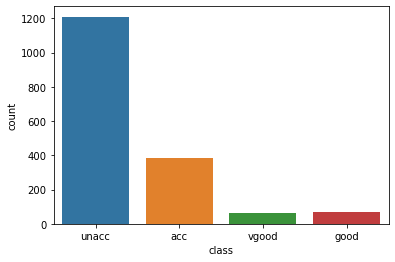

In [18]:
sns.countplot(df['class'])

The dataset is clearly dominated by unacceptable cars

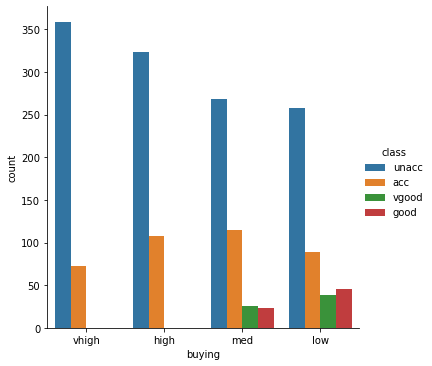

In [19]:
sns.catplot(kind='count', x='buying', hue='class', data=df)

- From the data medium buying level cars are most acceptable compared to others. Expensive cars are the most unacceptable and low grades car too are not wanted. 

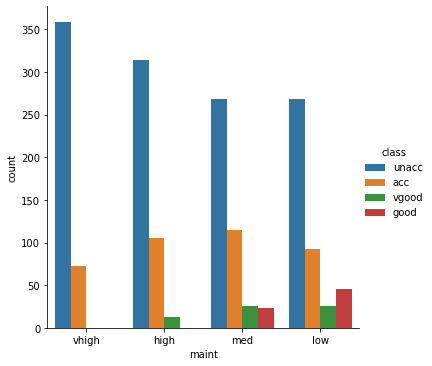

In [20]:
sns.catplot(kind='count', x='maint', hue='class', data=df)

- Cars with maintenance cost of medium to high is preferable, which is expected as the maintenance cost is linked to the price of the car. The higher the price of the car, the higher the maintenance cost.

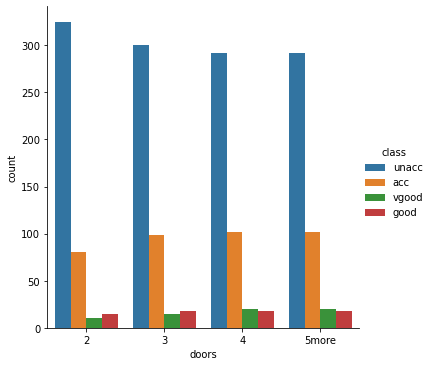

In [21]:
sns.catplot(kind='count', x='doors', hue='class', data=df)

- The number of doors is equivalently distributed between 3,4 to 5 or more cars, and 2 door cars are not preferred.

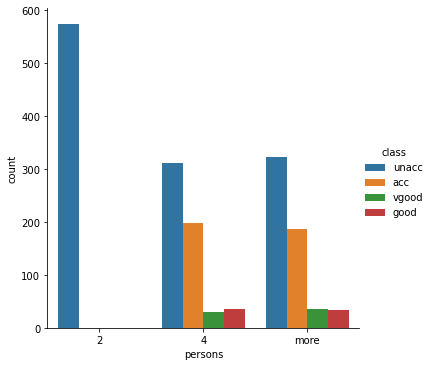

In [22]:
sns.catplot(kind='count', x='persons', hue='class', data=df)

- 4 and more person cars are most acceptable and a single user prefers cars with 2 person accomodation.

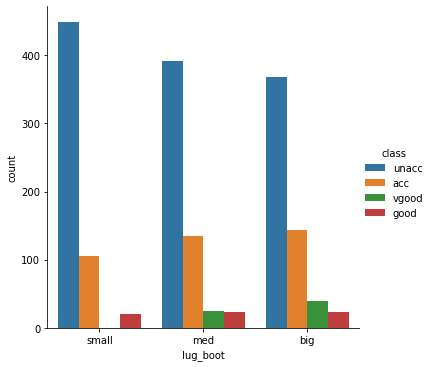

In [23]:
sns.catplot(kind='count', x='lug_boot', hue='class', data=df)

- The big boot sized luggage cars are the most acceptable

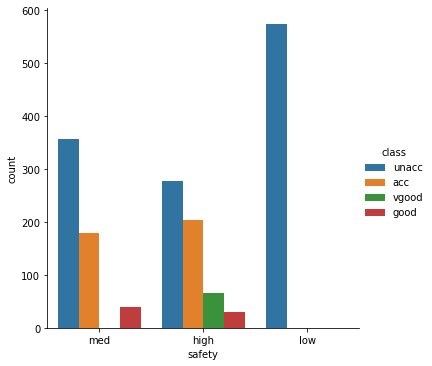

In [24]:
sns.catplot(kind='count', x='safety', hue='class', data=df)

- The high safety vehicles are most preferred

In [25]:
x = df.drop(['class'], axis=1)
y = df['class']

In [26]:
x.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high


In [27]:
y.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: class, dtype: object

# Encoding The Data

As shown above each column contains ordinal data. Ordinal data is categorical data which has some natural ordering (e.g. in the buying column the values range from low to vhigh. However in order for the model algorithm to use the data it needs to be in numerical form and this is achieved through encoding. 

In [28]:
df_encode = df.copy()
df_encode.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [29]:
df_encode['buying'] = df_encode['buying'].map({'low':0, 'med':1, 'high':2, 'vhigh':3})
df_encode['maint'] = df_encode['maint'].map({'low':0, 'med':1, 'high':2, 'vhigh':3})
df_encode['doors'] = df_encode['doors'].map({'2':0, '3':1, '4':2, '5more':3})
df_encode['persons'] = df_encode['persons'].map({'2':0, '4':1, 'more':2})
df_encode['lug_boot'] = df_encode['lug_boot'].map({'small':0, 'med':1, 'big':2})
df_encode['safety'] = df_encode['safety'].map({'low':0, 'med':1, 'high':2})
df_encode['class'] = df_encode['class'].map({'unacc':0, 'acc':1, 'good':2, 'vgood':3})
df_encode.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,0,1,0
1,3,3,0,0,0,2,0
2,3,3,0,0,1,0,0
3,3,3,0,0,1,1,0
4,3,3,0,0,1,2,0


### Creating and evaluating the model

In [30]:

X = df_encode.drop(['class'], axis=1)
y = df_encode['class']


In [31]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,0,1
1,3,3,0,0,0,2
2,3,3,0,0,1,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [100]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, GridSearchCV,cross_val_score
from sklearn.svm import SVC


Spliting the for training and testing

In [62]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## KNeighbors Classifier Model

In [67]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=45)

In [68]:
para_knn = {'n_neighbors':list(range(1,16)),'weights':['uniform','distance']}
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, para_knn, cv = cv, scoring='f1_micro')
grid_knn.fit(X_train,y_train)
y_pred_knn = grid_knn.predict(X_test)
nested_score_knn = cross_val_score(grid_knn, X = X, y = y, cv = cv) 


In [70]:
grid_knn.best_params_

{'n_neighbors': 7, 'weights': 'distance'}

In [88]:
accuracy_score(y_test, y_pred_knn)

0.9490740740740741

The model was correct with 94.9% of its predictions. 

Though the accuracy is a useful indicator of performance, a confusion matrix can be used to delve into more detail. Here it shows totals of the classifier's correct and incorrect predicted labels vs the actual labels for the test set. 

In [90]:
confusion_matrix(y_test, y_pred_knn, labels=[0, 1, 2, 3])

array([[290,   0,   0,   0],
       [ 10,  94,   1,   0],
       [  1,   4,   9,   2],
       [  0,   3,   1,  17]], dtype=int64)


The rows show the actual labels and the columns show the predicted labels.

The first row/column shows the actual/predicted unacceptable class labels. The precision is 96.3% (290/301) and the recall is 100% (290/290). The model classifier performed very well for this class.

The acceptable class has a precision of 93.1% (94/101) and a recall 89.5% (94/105)

The good class has a precision of 81.8% (94/101) and a recall 56.3% (9/16). The vgood class has a precision of 89.5% (17/19) and a recall 80.1% (17/21)

The classifier did well in predicting the unacceptable class, followed by the acceptable class. Perhaps this is because the classifier had more unacceptable class data to train on than it did the others and the acceptable car class too outnumberd the remaining class. 
Both of these classes had significantly less data for the classifier to train on than the two already mentioned, so again these lower values might result from that.


In [71]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       290
           1       0.93      0.90      0.91       105
           2       0.82      0.56      0.67        16
           3       0.89      0.81      0.85        21

    accuracy                           0.95       432
   macro avg       0.90      0.82      0.85       432
weighted avg       0.95      0.95      0.95       432



## Random Forest Classifier Model

In [34]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_predict = rf_classifier.predict(X_test)
# y_predict

- Lets Check the Accuracy

In [35]:
accuracy_score(y_test, y_predict)

0.9652777777777778

The Accuracy of the model is around 96%

In [36]:
# The labels were mapped in this order (unacc=0, acc=1, good=2, vgood=3)
confusion_matrix(y_test, y_predict, labels=[0, 1, 2, 3])

array([[290,   0,   0,   0],
       [  2, 100,   2,   1],
       [  0,   0,  12,   4],
       [  0,   5,   1,  15]], dtype=int64)

In [37]:
print(classification_report(y_test, y_predict, labels=[0, 1, 2, 3]))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       290
           1       0.95      0.95      0.95       105
           2       0.80      0.75      0.77        16
           3       0.75      0.71      0.73        21

    accuracy                           0.97       432
   macro avg       0.87      0.85      0.86       432
weighted avg       0.96      0.97      0.96       432



## SVM Classifier

In [102]:
para_svm = {'kernel':['rbf'],'C':[10],'gamma':[5]} 
svm = SVC(random_state = 45,probability = True)
grid_svm = GridSearchCV(svm, para_svm, cv = cv, scoring='f1_micro')
grid_svm.fit(X_train, y_train)
y_pred_svm = grid_svm.predict(X_test)


In [103]:
accuracy_score(y_test, y_pred_svm)

0.6712962962962963

In [98]:
print(classification_report(y_test, y_pred_svm, labels=[0, 1, 2, 3]))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80       290
           1       0.00      0.00      0.00       105
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        21

    accuracy                           0.67       432
   macro avg       0.17      0.25      0.20       432
weighted avg       0.45      0.67      0.54       432



C:\Users\Trainee-Judah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Trainee-Judah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Trainee-Judah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Future Selections

I would like to see if feature selection can be used to achieve a model with beter accuracy. 
Large datasets can have a lot of columns and it is expensive in terms of time and memory to use all the features. Selecting the proper features can improve model accuracy and also reduce the situation overfitting.

In [42]:

feat_names = list(X.columns.values)
feat_importances = rf_classifier.feature_importances_

for name, imp in zip(feat_names, feat_importances):
    print("{}: {}".format(name, imp))

buying: 0.16332590471471764
maint: 0.13933196715757798
doors: 0.06053651587310664
persons: 0.23455309602493865
lug_boot: 0.08878827913849228
safety: 0.3134642370911669


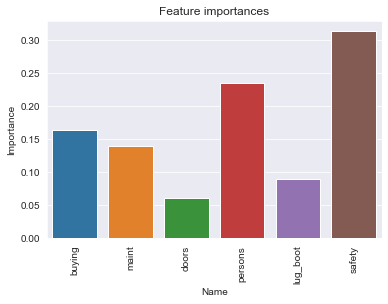

In [43]:
# Create bar plot of feature importance.
feat_imp_plot = sns.barplot(y=feat_importances, x=feat_names)
sns.set_style('darkgrid')
plt.title("Feature importances")
plt.xlabel('Name')
plt.ylabel('Importance')
feat_imp_plot.set_xticklabels(feat_imp_plot.get_xticklabels(), rotation=90)
plt.show()

Safety, responsible for almost a third of the prediction, is the most important feature in this car evaluation dataset. The number of doors  and luggage size are the features that have the least impact on the predictions. 

In [91]:
from sklearn.feature_selection import SelectFromModel

num_selected_features = []
acc_scores = []

for importance in feat_importances:
    
    sfm = SelectFromModel(rf_classifier, threshold=importance)
    sfm.fit(X_train, y_train)
    imp_feature_indices = sfm.get_support(indices=True)
    
    selected_features_count = len(imp_feature_indices)
    num_selected_features.append(selected_features_count)
    
    X_fstrain = sfm.transform(X_train)
    X_fstest = sfm.transform(X_test)

    clf_fs = RandomForestClassifier(n_estimators=100, random_state=42)
    clf_fs.fit(X_fstrain, y_train)
    y_fspred = clf_fs.predict(X_fstest)
    
    acc = accuracy_score(y_test, y_fspred)
    acc_scores.append(acc)
    

C:\Users\Trainee-Judah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


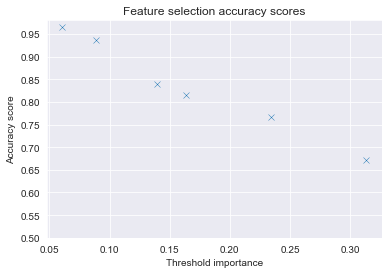

In [60]:
sns.scatterplot(feat_importances, acc_scores, marker='x')
sns.set_style('darkgrid')
plt.yticks(np.arange(0.5, 1, 0.05))
plt.title("Feature selection accuracy scores")
plt.xlabel("Threshold importance")
plt.ylabel("Accuracy score")
plt.show()

The graph clearly shows that the model performs well with all features present. As features are eliminated, the model's performance decreases

### Model Comparism

From all the performance metrics, random forest classifier perfromed better than all the classifiers

In [76]:
with open("rf_classifier.pkl", "wb") as rf_model:
    joblib.dump(rf_classifier, rf_model)

In [77]:
with open("knn_classifier.pkl", "wb") as knn_model:
    joblib.dump(knn , knn_model)